In [1]:
import torchvision.datasets as dts
from torchvision.transforms import ToTensor

In [2]:
def divider():
    print("-----------------------------------")

train_set = dts.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_set = dts.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)
print("DONE")

DONE


In [3]:
print(f"Train Set: {train_set}")
divider()
print(f"Test Set: {test_set}")

Train Set: Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
-----------------------------------
Test Set: Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [4]:
import torch
import matplotlib.pyplot as plt

In [5]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

In [6]:
print(f"Train Loader: {train_loader}")
divider()
print(f"Test Loader: {test_loader}")

Train Loader: <torch.utils.data.dataloader.DataLoader object at 0x280284dd0>
-----------------------------------
Test Loader: <torch.utils.data.dataloader.DataLoader object at 0x280191790>


In [7]:
data_iterator = iter(train_loader)
images, labels = next(data_iterator)
print(f"Images: {images}")
divider()
print(f"Labels: {labels}")

Images: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0., 

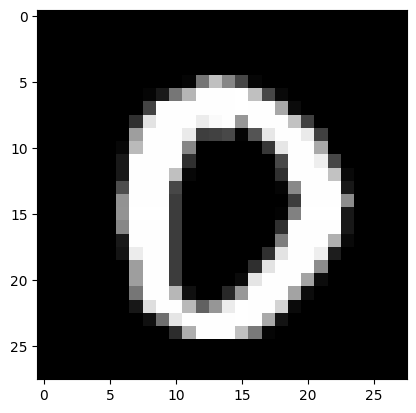

In [8]:
import random
plt.imshow(random.choice(images).numpy().squeeze(), cmap='gray');

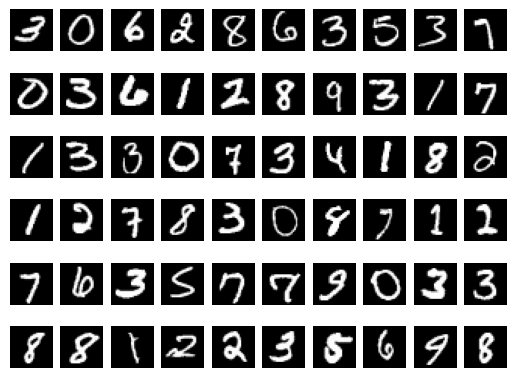

In [9]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray')

# Machine Learning
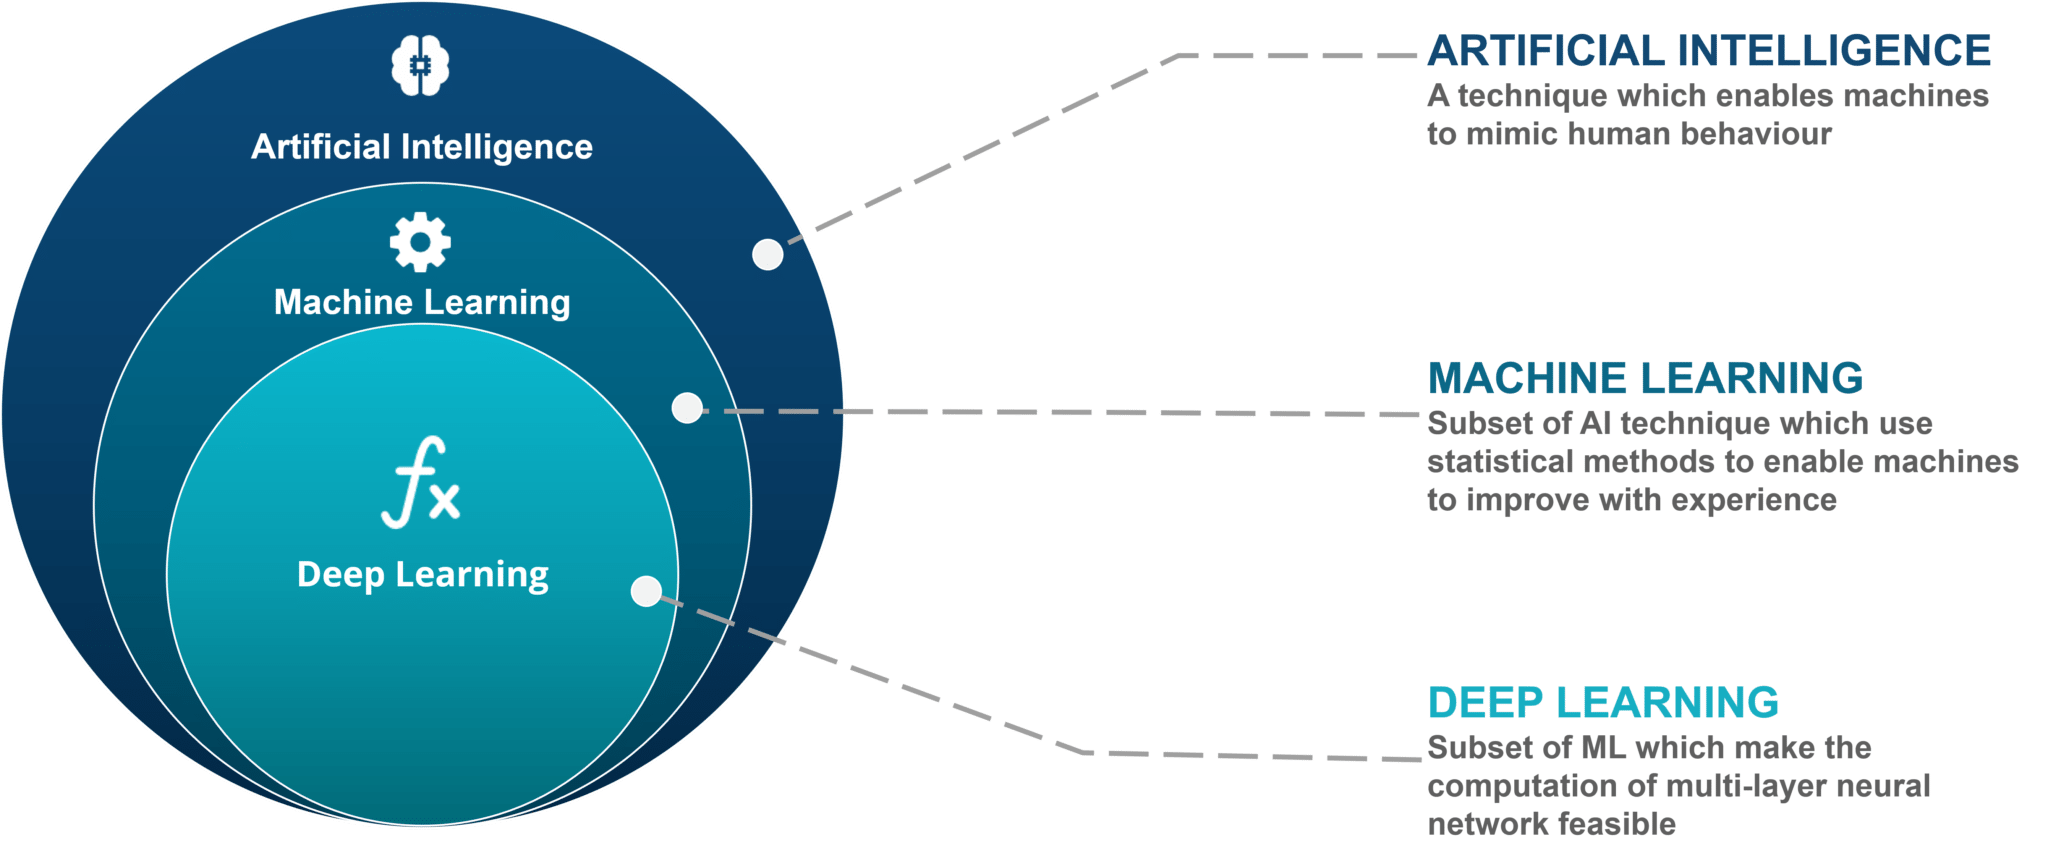

### There are types of ML, here we'll discuss them -> [Here](https://drive.google.com/file/d/1I92qAcw3PYzwufrkbmIccH55zDgy4QIu/view?usp=sharing)

# Prerequisites
## Tensors
Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

In [10]:
import torch

### Initialize a Tensor

In [11]:
shape = (2, 3)
tensor = torch.rand(shape)
print(f"Tensor: {tensor}")

Tensor: tensor([[0.5354, 0.9117, 0.9164],
        [0.1203, 0.1318, 0.5275]])


In [12]:
data = [
    [2, 3],
    [3, 4],
]

### Initialize a Tensor from array

In [13]:
tensor_data = torch.tensor(data)
print(f"Tensor: {tensor_data}")
print(f"Type: {type(tensor_data)}")

Tensor: tensor([[2, 3],
        [3, 4]])
Type: <class 'torch.Tensor'>


In [14]:
import numpy as np
data = np.array([1, 2, 3])

tensor_numpy = torch.from_numpy(data)
print(f"Numpy Tensor: {tensor_numpy}")

Numpy Tensor: tensor([1, 2, 3])


### Tensor Attributes

In [15]:
print(f"Shape: {tensor_data.shape}")
print(f"Data Type: {tensor_data.dtype}")
print(f"Device: {tensor_data.device}")

Shape: torch.Size([2, 2])
Data Type: torch.int64
Device: cpu


In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

Device: cpu


# Steps on making a model
1. Getting the data right
2. Building (or choosing) a model
3. Fitting the model (Training)


4. Making predictions (Inference)
5. Saving and loading the model
6. Putting all together

## <font color="green">Linear Regression Workshop</font>


In [17]:
# Creating known parameters (Y = 0.7 * X + 0.3)
weight = 0.7 # slope
bias = 0.3 # intercept

# Creating data
start = 0
end = 10
step = 0.2

X = torch.arange(start, end, step)
y = weight * X + bias

print(f"X: {X[:10]}")
print(f"y: {y[:10]}")

X: tensor([0.0000, 0.2000, 0.4000, 0.6000, 0.8000, 1.0000, 1.2000, 1.4000, 1.6000,
        1.8000])
y: tensor([0.3000, 0.4400, 0.5800, 0.7200, 0.8600, 1.0000, 1.1400, 1.2800, 1.4200,
        1.5600])


In [18]:
# Create train and test sets
splitter = int(0.8 * len(X))
X_train, y_train = X[:splitter], y[:splitter]
X_test, y_test = X[splitter:], y[splitter:]

print(f"Train Length: {len(X_train)}")
print(f"Test Length: {len(X_test)}")

Train Length: 40
Test Length: 10


In [19]:
def plot_predictions(train_data: torch.Tensor,
                     train_labels: torch.Tensor,
                     test_data: torch.Tensor,
                     test_labels: torch.Tensor,
                     predictions: torch.Tensor = None):
    plt.figure(figsize=(5, 4))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend(prop={"size": 14});

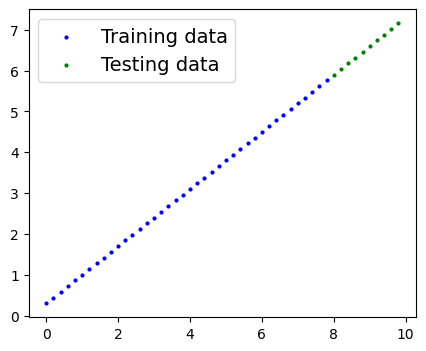

In [20]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

In [21]:
# Build Model
import torch
import torch.nn as nn
class LinearRegressionModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))
        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))
    def forward(self, x: torch.Tensor):
        y = x * self.weights + self.bias #  as the formula (y = x * w + b)
        return y

In [22]:
model_0 = LinearRegressionModel()
print(f"Model_0 Parameters: {list(model_0.parameters())}")
divider()
print(f"Named Parameters: {model_0.state_dict()}")


Model_0 Parameters: [Parameter containing:
tensor([0.5640], requires_grad=True), Parameter containing:
tensor([0.2894], requires_grad=True)]
-----------------------------------
Named Parameters: OrderedDict([('weights', tensor([0.5640])), ('bias', tensor([0.2894]))])


In [23]:
# Predict
with torch.inference_mode(): 
    y_preds = model_0(X_test)

print(f"Predicted value: {y_preds}")

Predicted value: tensor([4.8016, 4.9144, 5.0272, 5.1400, 5.2528, 5.3656, 5.4784, 5.5912, 5.7040,
        5.8168])


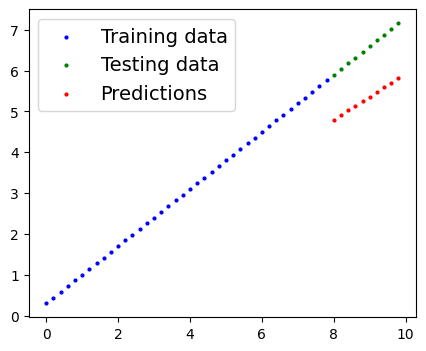

In [24]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [25]:
print(f"Difference between labeled data and predictions {y_test - y_preds}")

Difference between labeled data and predictions tensor([1.0984, 1.1256, 1.1528, 1.1800, 1.2072, 1.2344, 1.2616, 1.2888, 1.3160,
        1.3432])


## Loss Function
Measures how wrong your models predictions (e.g. y_preds) are compared to the truth labels (e.g. y_test). Lower the better.

In [26]:
print(f"Loss in one parameter: {y_preds[0] - y_test[0]}")

Loss in one parameter: -1.098416805267334


In [27]:
loss_function = nn.L1Loss() # Mean Absolute Error

## Optimizer
Tells your model how to update its internal parameters to best lower the loss.

In [28]:
optimizer = torch.optim.SGD(model_0.parameters(), # model parameters to optimize
                              lr=0.001, # learning rate (how fast the model learns)
                            )

In [29]:
def train(
        model: nn.Module,
        train_data: torch.Tensor,
        train_labels: torch.Tensor,
        test_data: torch.Tensor,
        test_labels: torch.Tensor,
        loss_function: nn.Module,
        optimizer: torch.optim.Optimizer,
        epochs: int,
    ):
    epochs_count ,train_loss_arr, test_loss_arr = [], [], []
    for epoch in range(epochs+1):
        model.train()
        y_pred = model(train_data)
        loss = loss_function(y_pred, train_labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        with torch.inference_mode():
            y_pred = model(test_data)
            test_loss = loss_function(y_pred, test_labels)

        if epoch % 10 == 0:
            epochs_count.append(epoch)
            train_loss_arr.append(loss.detach().numpy())
            test_loss_arr.append(test_loss.detach().numpy())
            print(f"Epoch {epoch}: MAE Loss: {loss.item():0.2f} | Test Loss: {test_loss.item():0.2f}")
    return epochs_count, train_loss_arr, test_loss_arr


In [30]:
epochs_count, train_loss, test_loss = train(
                                        model_0, 
                                        train_data=X_train, 
                                        train_labels=y_train, 
                                        test_data=X_test, 
                                        test_labels=y_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer, 
                                        epochs=1000
                                    )

Epoch 0: MAE Loss: 0.54 | Test Loss: 1.19
Epoch 10: MAE Loss: 0.38 | Test Loss: 0.83
Epoch 20: MAE Loss: 0.22 | Test Loss: 0.47
Epoch 30: MAE Loss: 0.06 | Test Loss: 0.12
Epoch 40: MAE Loss: 0.01 | Test Loss: 0.00
Epoch 50: MAE Loss: 0.01 | Test Loss: 0.00
Epoch 60: MAE Loss: 0.01 | Test Loss: 0.02
Epoch 70: MAE Loss: 0.00 | Test Loss: 0.04
Epoch 80: MAE Loss: 0.00 | Test Loss: 0.03
Epoch 90: MAE Loss: 0.00 | Test Loss: 0.03
Epoch 100: MAE Loss: 0.00 | Test Loss: 0.04
Epoch 110: MAE Loss: 0.01 | Test Loss: 0.03
Epoch 120: MAE Loss: 0.00 | Test Loss: 0.03
Epoch 130: MAE Loss: 0.00 | Test Loss: 0.03
Epoch 140: MAE Loss: 0.00 | Test Loss: 0.03
Epoch 150: MAE Loss: 0.00 | Test Loss: 0.03
Epoch 160: MAE Loss: 0.00 | Test Loss: 0.03
Epoch 170: MAE Loss: 0.00 | Test Loss: 0.03
Epoch 180: MAE Loss: 0.00 | Test Loss: 0.03
Epoch 190: MAE Loss: 0.00 | Test Loss: 0.03
Epoch 200: MAE Loss: 0.00 | Test Loss: 0.03
Epoch 210: MAE Loss: 0.00 | Test Loss: 0.03
Epoch 220: MAE Loss: 0.00 | Test Loss: 0.03

In [31]:
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

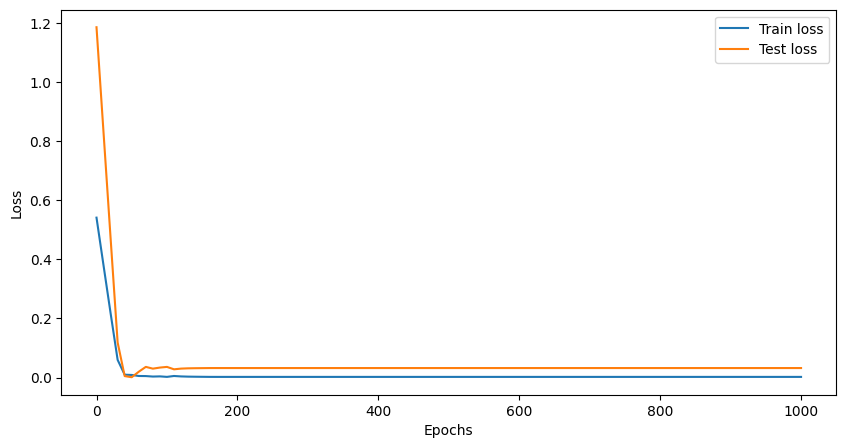

In [32]:
plot_stats(epochs_count, train_loss, test_loss)

In [33]:
def predict(model, X):
    with torch.inference_mode():
        y_pred = model(X)
        return y_pred

In [34]:
y_preds = predict(model_0, X_test)

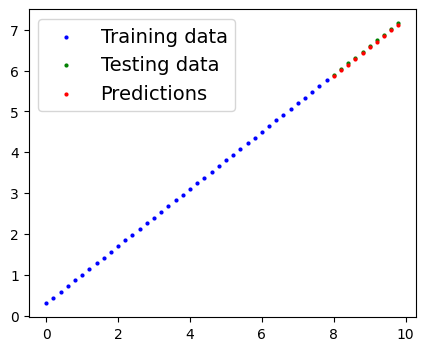

In [35]:
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_preds,
)

In [36]:
print(f"Model Parameters: {model_0.state_dict()}")

Model Parameters: OrderedDict([('weights', tensor([0.6964])), ('bias', tensor([0.3000]))])


In [37]:
# Save model
from pathlib import Path

# Create a folder to save our models
model_path = Path('models')
model_path.mkdir(parents=True, exist_ok=True)

# Save the model
model_name = 'model_0.pth'
model_save_path = model_path / model_name

print(f"Saving model to: {model_save_path}")
torch.save(model_0.state_dict(), model_save_path)

Saving model to: models/model_0.pth


# Terminologies & Recap
1. **Feature**: A feature is an individual measurable property of a phenomenon being observed.
2. **Hyperparameter**: A parameter whose value is set before the learning process begins. It determines how the model is trained. It is not affected by the training process.
3. **Loss Function**: A function that tells us how good our model is. It measures the difference between the predicted value and the actual value.
4. **Optimizer**: A function that tries to minimize the loss function. It does so by adjusting the weights of the model.
5. **Learning Rate**: The amount by which the weights are adjusted during training. It is a hyperparameter that determines how fast the model is trained. A high learning rate means that the model is trained faster but it may not be accurate. A low learning rate means that the model is trained slower but it is more accurate.
6. **Epochs**: The number of times the model is trained on the entire dataset.
7. **Train and Test Dataset**: The dataset that is used to train the model is called the train dataset and the dataset that is used to test the model is called the test dataset.


4. **How to Make ML/DL**:
   1. **Data Preparation**: Preparing the data for the model.
   2. **Model Preparation**: Preparing the model for the data.
   3. **Model Training**: Training the model on the data.
   4. **Model Evaluation**: Evaluating the model on the test data.
   5. **Prediction**: Making predictions using the model.


   6. **Saving and Loading Model**: Saving the model for future use.
